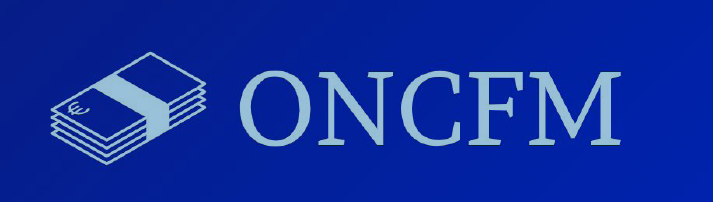

In [1]:
# import librairies and functions needed for project

# utilities
import os, warnings
os.environ["OMP_NUM_THREADS"] = '1'  # needed to avoid memory leak warning with K-Means in Windows environment
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)  # ignore all future warnings

# data
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)  # maximise dataframe display

# modelisation
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})

# import user-defined functions
from functions import *
col = findColor('blue.png')  # use company logo colour in graphs

# 1 - Import des donnees

In [2]:
# Import data
x_train = pd.read_csv('x_train.csv', encoding='latin_1')
print(x_train.shape)
x_train.head()

(1200, 6)


,diagonal,height_left,height_right,margin_low,margin_up,length
0,172.28,104.62,103.80,4.08,3.08,113.26
1,171.90,104.50,103.49,4.08,2.82,113.50
2,171.63,104.33,104.61,4.88,3.35,112.16
3,172.06,104.28,104.31,5.61,3.27,111.61
4,172.10,104.42,103.60,4.18,2.89,113.32


In [3]:
# Import data
x_test = pd.read_csv('x_test.csv', encoding='latin_1')
print(x_test.shape)
x_test.head()

(300, 6)


,diagonal,height_left,height_right,margin_low,margin_up,length
0,172.26,103.90,104.12,4.990000,3.42,111.27
1,171.65,104.32,104.38,5.650000,3.24,112.30
2,171.53,103.53,103.63,4.040000,2.96,112.76
3,172.30,103.66,103.50,4.160539,3.16,112.95
4,172.17,103.79,103.54,4.070000,2.78,113.03


In [4]:
y_train = pd.read_csv('y_train.csv', encoding='latin_1')
print(y_train.shape)
y_train.head()

(1200, 1)


,is_genuine
0,True
1,True
2,False
3,False
4,True


In [5]:
y_test = pd.read_csv('y_test.csv', encoding='latin_1')
print(y_test.shape)
y_test.head()

(300, 1)


,is_genuine
0,False
1,False
2,True
3,True
4,True


In [6]:
# check for missing values
if (((x_train.loc[x_train.isna().any(axis=1) == True].shape[0]) != 0)
    | ((y_train.loc[y_train.isna().any(axis=1) == True].shape[0]) != 0)
    | ((x_test.loc[x_test.isna().any(axis=1) == True].shape[0]) != 0)
    | ((y_test.loc[y_test.isna().any(axis=1) == True].shape[0]) != 0)
   ):
    print("!!! Valeurs manquantes !!!")
else:
    print ("Pas de valeurs manquantes dans les tables.")
    
# check for missing data
if (((x_train.loc[x_train.isnull().any(axis=1) == True].shape[0]) != 0)
    | ((y_train.loc[y_train.isnull().any(axis=1) == True].shape[0]) != 0)
    | ((x_test.loc[x_test.isnull().any(axis=1) == True].shape[0]) != 0)
    | ((y_test.loc[y_test.isnull().any(axis=1) == True].shape[0]) != 0)   
   ):
    print("!!! Valeurs nulles !!! ")
else:
    print ("Pas de valeurs nulles dans les tables.")
    
# check for duplicates
if (((x_train.loc[x_train.duplicated() == True].shape[0]) != 0)
    | ((x_test.loc[x_test.duplicated() == True].shape[0]) != 0)
   ):
    print("!!! Doublons dans les tables !!!")
else:
    print ("Pas de doublons dans les tables.")

Pas de valeurs manquantes dans les tables.
Pas de valeurs nulles dans les tables.
Pas de doublons dans les tables.


In [7]:
# rename column
y_train = y_train.rename(columns={"is_genuine":"target"})
y_train.head()

,target
0,True
1,True
2,False
3,False
4,True


In [8]:
# rename column
y_test = y_test.rename(columns={"is_genuine":"target"})
y_test.head()

,target
0,False
1,False
2,True
3,True
4,True


### HASHTAG SECTIONS below to run regression & optimisation on full dataset (else significant variables only will be used)

In [9]:
Y = y_train.values.ravel()
X = x_train.copy()
X = sm.add_constant(X, prepend=True, has_constant='skip')
reg_log_1 = sm.GLM(endog=Y, exog=X, family=sm.families.Binomial()).fit()
print(reg_log_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1193
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36.650
Date:                Tue, 27 Jun 2023   Deviance:                       73.299
Time:                        07:47:12   Pearson chi2:                 1.96e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.6988
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -81.6224    257.021     -0.318   

La p-value des variables diagonal et height_left est tres superieure a 5%, donc ces variables ne sont pas significatives pour la regression logistique. Nous procedons par elimination en retirant en premier lieu diagonal dont la p_value est la plus elevee.

In [10]:
X_2 = x_train.drop(columns='diagonal').copy()
X_2 = sm.add_constant(X_2, prepend=True, has_constant='skip')
reg_log_2 = sm.GLM(endog=Y, exog=X_2, family=sm.families.Binomial()).fit()
print(reg_log_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36.713
Date:                Tue, 27 Jun 2023   Deviance:                       73.426
Time:                        07:47:12   Pearson chi2:                 1.89e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.6988
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -148.9974    174.810     -0.852   

La p-value de la variable height_left est toujours superieure a 5%, donc nous retirons egalement cette variable de l'analyse.

In [11]:
X_3 = x_train.drop(columns={'diagonal', 'height_left'}).copy()
X_3 = sm.add_constant(X_3, prepend=True, has_constant='skip')
reg_log_3 = sm.GLM(endog=Y, exog=X_3, family=sm.families.Binomial()).fit()
print(reg_log_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1195
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37.803
Date:                Tue, 27 Jun 2023   Deviance:                       75.605
Time:                        07:47:12   Pearson chi2:                 2.45e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.6983
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -296.0525    152.148     -1.946   

Toutes nos variables ont a present des p-values inferieures a 5%.

In [12]:
x_train.drop(columns={'diagonal', 'height_left'}, inplace=True, errors='raise')
print(x_train.shape)
x_train.head()

(1200, 4)


,height_right,margin_low,margin_up,length
0,103.80,4.08,3.08,113.26
1,103.49,4.08,2.82,113.50
2,104.61,4.88,3.35,112.16
3,104.31,5.61,3.27,111.61
4,103.60,4.18,2.89,113.32


In [13]:
x_test.drop(columns={'diagonal', 'height_left'}, inplace=True, errors='raise')
print(x_test.shape)
x_test.head()

(300, 4)


,height_right,margin_low,margin_up,length
0,104.12,4.990000,3.42,111.27
1,104.38,5.650000,3.24,112.30
2,103.63,4.040000,2.96,112.76
3,103.50,4.160539,3.16,112.95
4,103.54,4.070000,2.78,113.03


### END HASHTAG SECTIONS

In [14]:
# center & reduce data
std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(x_train)
x_test_scaled = std_scaler.transform(x_test)

### La regression logistique est implementee dans scikit-learn : sklearn.linear_model.LogisticRegression. Regularisation :  on peut utiliser la regularisation pour controler les coefficients d'une regression lineaire, et eviter le sur-apprentissage ou creer des modeles parcimonieux. Les memes concepts s'appliquent a la regression logistique, a la difference que la regression logistique regularisee par la norme ℓ2 n'admet pas de solution explicite. On pourra donc utiliser la regression logistique avec regularisation  ℓ2 pour eviter le sur-apprentissage (dans scikit-learn, c'est meme l'implémentation par defaut de la regression logistique) ou la regression logistique avec regularisation ℓ1 pour obtenir un modele parcimonieux (dans scikit-learn, il suffit d'utiliser l'option 'penalty'=l1).

# 2 - Regression logistique avec Scikit-Learn

## 2.1 - Regression logistique "standard"

In [15]:
# initialize regression
estimator = LogisticRegression(solver="liblinear", random_state=42)
estimator.fit(x_train_scaled, y_train.values.ravel())

# predict results
y_pred = estimator.predict(x_test_scaled)
y_prob = estimator.predict_proba(x_test_scaled).round(2)

In [16]:
# compute and print R2 on training and testing sets
def score(estimator):
    tr_score = estimator.score(x_train_scaled, y_train.values.ravel()).round(4)
    te_score = estimator.score(x_test_scaled, y_test.values.ravel()).round(4)
    print(f"R2 train: {tr_score} R2 test: {te_score}")

In [17]:
score(estimator)

R2 train: 0.9908 R2 test: 0.99


In [18]:
# calculate precision score ie the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false
# positives => measures the ability of the classifier not to label as positive a sample that is negative (190/193 here)
print("Precision score:", round(precision_score(y_test.values.ravel(), y_pred),4))  # (190/193 here)

Precision score: 0.9845


In [19]:
# calculate recall score ie the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false
# negatives => measures the ability of the classifier to find all the positive samples
print("Recall score:", round(recall_score(y_test.values.ravel(), y_pred),4))  # (190/190 here)

Recall score: 1.0


In [20]:
estimator.intercept_

array([1.89596005])

In [21]:
print("Coefficients: \n", estimator.coef_)

Coefficients: 
 [[-0.79290794 -2.59286167 -1.50997192  3.57526725]]


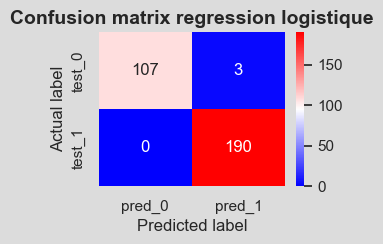

In [22]:
# heatmap of confusion matrix
conf_reglog = confusion(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(pd.DataFrame(conf_reglog), annot=True, cmap="bwr", fmt='g')
plt.title('Confusion matrix regression logistique', fontsize=14, fontweight='bold')
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.savefig("conf_matrix_reglog_init.png", bbox_inches='tight', pad_inches=0.5)
plt.show()

#### La regression logistique sans optimisation des hyper-parametres donne un taux de faux negatifs de zero (0/190) mais un taux de faux positifs de 2.73% (3/110). Nous allons donc essayer d'optimiser les hyper-parametres afin de faire diminuer ce taux sans compromettre le taux de faux negayifs dans la mesure du possible (il s'agit en effet d'une erreur "moins grave" sur laquelle une tolerance peut etre admise).

## 2.2 - Optimisation de la regression logistique avec GridSearchCV

The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:

‘lbfgs’ - [‘l2’, None]

‘liblinear’ - [‘l1’, ‘l2’]

‘newton-cg’ - [‘l2’, None]

‘newton-cholesky’ - [‘l2’, None]

‘sag’ - [‘l2’, None]

‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]

Note ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### Nous etablissons donc 3 groupes d'hyper-parametres pour tester le modele avec les differents algorithmes de regression logistique offerts par Scikit-Learn, tous les solveurs n'acceptant pas les memes penalites en entree.

In [23]:
estimator = LogisticRegression()

# newton-cg, lbfgs and sag solvers
params_nsag = {'C':np.logspace(-3, 3, 7),
              'penalty':['l2', 'none'],
              'solver':['newton-cg', 'lbfgs', 'sag'],
              'random_state':[42],
              'class_weight':[None, 'balanced'],
               'max_iter':[500]
              }

# liblin solver
params_liblin = {'C':np.logspace(-3, 3, 7),
                'penalty':['l1', 'l2'],
                'solver':['liblinear'],
                'random_state':[42],
                'class_weight':[None, 'balanced'],
                'max_iter': [500]
                }

# saga solver
params_saga = {'C':np.logspace(-3,3,7),
              'penalty':['l1','l2','elasticnet', 'none'],
              'solver':['saga'],
              'random_state':[42],
              'class_weight':[None, 'balanced'],
              'max_iter':[500],
              "l1_ratio":[0,0.25,0.5,0.75,1]
              }

### 2.2.1 - Solveurs newton-cg, lbfgs et sag

In [24]:
grid_nsag = GridSearchCV(estimator,
                         params_nsag,
                         cv=10,
                         n_jobs=-1,
                         return_train_score=True,
                         verbose=0)
grid_nsag.fit(x_train_scaled, y_train.values.ravel())

# see dox here
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'class_weight': [None, 'balanced'], 'max_iter': [500],
                         'penalty': ['l2', 'none'], 'random_state': [42],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             return_train_score=True)

In [25]:
best_params_nsag = grid_nsag.best_params_
best_params_nsag

{'C': 0.001,
 'class_weight': None,
 'max_iter': 500,
 'penalty': 'none',
 'random_state': 42,
 'solver': 'newton-cg'}

In [26]:
estimator_nsag = LogisticRegression(**best_params_nsag)
estimator_nsag.fit(x_test_scaled, y_test.values.ravel())
y_pred_nsag = estimator_nsag.predict(x_test_scaled)

In [27]:
score(estimator_nsag)

R2 train: 0.9867 R2 test: 1.0


In [28]:
# calculate precision score 
print("Precision score:", round(precision_score(y_test.values.ravel(), y_pred_nsag),4))  # (190/190 here)

Precision score: 1.0


In [29]:
# calculate recall score
print("Recall score:", round(recall_score(y_test.values.ravel(), y_pred_nsag),4))  # (190/190 here)

Recall score: 1.0


In [30]:
print("Intercept: \n", *estimator_nsag.intercept_)

Intercept: 
 35.60378935473794


In [31]:
print("Coefficients: \n", *estimator_nsag.coef_)

Coefficients: 
 [  1.64209929 -59.14233373 -52.54860626  75.7667726 ]


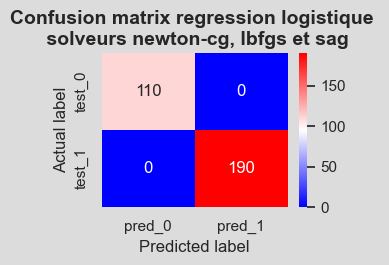

In [32]:
# heatmap of confusion matrix
conf_nsag = confusion(y_test.values.ravel(), y_pred_nsag)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(pd.DataFrame(conf_nsag), annot=True, cmap="bwr", fmt='g')
plt.title('Confusion matrix regression logistique \n solveurs newton-cg, lbfgs et sag', fontsize=14, fontweight='bold')
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.savefig("conf_matrix_nsag.png", bbox_inches='tight', pad_inches=0.5)
plt.show()

### 2.2.2 - Solveur liblin

In [33]:
grid_liblin = GridSearchCV(estimator,
                           params_liblin,
                           cv=10,
                           n_jobs=-1,
                           return_train_score=True,
                           verbose=0)
grid_liblin.fit(x_train_scaled, y_train.values.ravel())

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'class_weight': [None, 'balanced'], 'max_iter': [500],
                         'penalty': ['l1', 'l2'], 'random_state': [42],
                         'solver': ['liblinear']},
             return_train_score=True)

In [34]:
best_params_liblin = grid_liblin.best_params_
best_params_liblin

{'C': 0.1,
 'class_weight': None,
 'max_iter': 500,
 'penalty': 'l1',
 'random_state': 42,
 'solver': 'liblinear'}

In [35]:
estimator_liblin = LogisticRegression(**best_params_liblin)
estimator_liblin.fit(x_test_scaled, y_test.values.ravel())
y_pred_liblin = estimator_liblin.predict(x_test_scaled)

In [36]:
score(estimator_liblin)

R2 train: 0.9908 R2 test: 0.9967


In [37]:
# calculate precision score
print("Precision score:", round(precision_score(y_test.values.ravel(), y_pred_liblin),4))  # (190/191 here)

Precision score: 0.9948


In [38]:
# calculate recall score
print("Recall score:", round(recall_score(y_test.values.ravel(), y_pred_liblin),4))  # (190/190 here)

Recall score: 1.0


In [39]:
print("Intercept: \n", *estimator_liblin.intercept_)

Intercept: 
 0.6208147593219484


In [40]:
print("Coefficients: \n", *estimator_liblin.coef_)

Coefficients: 
 [-0.08141933 -1.48322109 -0.48407812  1.84395348]


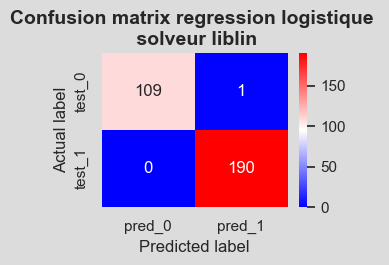

In [41]:
# heatmap of confusion matrix
conf_liblin = confusion(y_test.values.ravel(), y_pred_liblin)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(pd.DataFrame(conf_liblin), annot=True, cmap="bwr", fmt='g')
plt.title('Confusion matrix regression logistique \n solveur liblin', fontsize=14, fontweight='bold')
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.savefig("conf_matrix_liblin.png", bbox_inches='tight', pad_inches=0.5)
plt.show()

### 2.2.3 - Solveur saga

In [42]:
grid_saga = GridSearchCV(estimator,
                         params_saga,
                         cv=10,
                         n_jobs=-1,
                         return_train_score=True,
                         verbose=0)
grid_saga.fit(x_train_scaled, y_train.values.ravel())

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'class_weight': [None, 'balanced'],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1], 'max_iter': [500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [42], 'solver': ['saga']},
             return_train_score=True)

In [43]:
best_params_saga = grid_saga.best_params_
best_params_saga

{'C': 0.001,
 'class_weight': None,
 'l1_ratio': 0,
 'max_iter': 500,
 'penalty': 'none',
 'random_state': 42,
 'solver': 'saga'}

In [44]:
estimator_saga = LogisticRegression(**best_params_saga)
estimator_saga.fit(x_test_scaled, y_test.values.ravel())
y_pred_saga = estimator_saga.predict(x_test_scaled)

In [45]:
score(estimator_saga)

R2 train: 0.9875 R2 test: 1.0


In [46]:
# calculate precision score
print("Precision score:", round(precision_score(y_test.values.ravel(), y_pred_saga),4))  # (190/190 here)

Precision score: 1.0


In [47]:
# calculate recall score
print("Recall score:", round(recall_score(y_test.values.ravel(), y_pred_saga),4))  # (190/190 here)

Recall score: 1.0


In [48]:
print("Intercept: \n", *estimator_saga.intercept_)

Intercept: 
 5.231180942544824


In [49]:
print("Coefficients: \n", *estimator_saga.coef_)

Coefficients: 
 [-0.35044082 -9.79296762 -7.7313473  12.05529263]


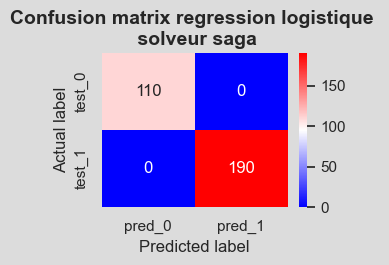

In [50]:
# heatmap of confusion matrix
conf_saga = confusion(y_test.values.ravel(), y_pred_saga)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(pd.DataFrame(conf_saga), annot=True, cmap="bwr", fmt='g')
plt.title('Confusion matrix regression logistique \n solveur saga', fontsize=14, fontweight='bold')
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.savefig("conf_matrix_saga.png", bbox_inches='tight', pad_inches=0.5)
plt.show()

### Resultats de la regression logistique optimisee (variables significatives seulement) :

Les meilleurs modeles sont donc les solveurs Newton-cg et saga, parcequ'il minimisent a la fois les faux positifs (i.e. faux billets identifies comme vrais, ici 0 / 110) et les faux negatifs (vrais billets identifies comme faux, ici 0 / 190).

Les hyperparametres optimises sont les suivants:

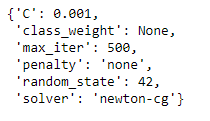
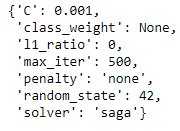

Nous poursuivrons donc l'analyse ici avec le modele saga en application des recommandations de la documentation de scikit-learn et en raison d'une efficacite computationelle plus grande que celle de l'algorithme newton-cg (convergence plus rapide sur des donnees centrees-reduites).

## 2.3 - Regression Logistique finale

In [51]:
estimator_final = LogisticRegression(**best_params_saga)
estimator_final.fit(x_train_scaled, y_train.values.ravel())
y_pred_final = estimator_final.predict(x_test_scaled)

In [52]:
score(estimator_final)

R2 train: 0.9917 R2 test: 0.9867


In [53]:
# calculate precision score
print("Precision score:", round(precision_score(y_test.values.ravel(), y_pred_final),4))  # (190/194 here)

Precision score: 0.9794


In [54]:
# calculate recall score
print("Recall score:", round(recall_score(y_test.values.ravel(), y_pred_final),4))  # (190/190 here)

Recall score: 1.0


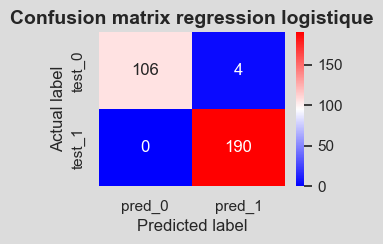

In [55]:
# heatmap of confusion matrix
conf_final = confusion(y_test.values.ravel(), y_pred_final)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(pd.DataFrame(conf_final), annot=True, cmap="bwr", fmt='g')
plt.title('Confusion matrix regression logistique', fontsize=14, fontweight='bold')
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.savefig("conf_matrix_final.png", bbox_inches='tight', pad_inches=0.5)
plt.show()

In [56]:
print("Coefficients: \n", *estimator_final.coef_)

Coefficients: 
 [-0.90202564 -3.44169739 -2.00298263  4.96024592]


In [57]:
print("Intercept: \n", *estimator_final.intercept_)

Intercept: 
 2.3657089413391565


### 2.4 - Prediction sur fichier de production

In [58]:
# Import data
data_prod = pd.read_csv('billets_production.csv', encoding='latin_1')

# check for missing values
if (data_prod.loc[data_prod.isna().any(axis=1) == True].shape[0]) != 0:
    print("!!! Valeurs manquantes !!!")
else:
    print ("Pas de valeurs manquantes.")
# check for missing data
if (data_prod.loc[data_prod.isnull().any(axis=1) == True].shape[0]) != 0:
    print("!!! Valeurs nulles !!! ")
else:
    print ("Pas de valeurs nulles.")
# check for duplicates
if (data_prod.loc[data_prod.duplicated() == True].shape[0]) != 0:
    print("!!! Doublons dans la table !!!")
else:
    print ("Pas de doublons dans la table.")

Pas de valeurs manquantes.
Pas de valeurs nulles.
Pas de doublons dans la table.


In [59]:
# split file

# use if running model with all variables
# X = data_prod[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

# use if running model with significant variables only
X = data_prod[['height_right', 'margin_low', 'margin_up', 'length']]

X_scaled = std_scaler.transform(X)
banknotes_prod = data_prod['id']
X

,height_right,margin_low,margin_up,length
0,103.54,5.21,3.30,111.42
1,104.13,6.00,3.31,112.09
2,104.29,4.99,3.39,111.57
3,104.34,4.44,3.03,113.20
4,103.56,3.77,3.16,113.33


In [60]:
# predict banknote type
data_prod['proba'] = estimator_final.predict_proba(X_scaled)[:, 1]
data_prod.loc[data_prod['proba'] > 0.5, 'labels_pred_reglog'] = True
data_prod.loc[data_prod['proba'] <= 0.5, 'labels_pred_reglog'] = False
data_prod.to_csv('data_prod.csv', index=False, encoding='latin_1')
data_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id,proba,labels_pred_reglog
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0.000137,False
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.000017,False
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0.000058,False
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0.995035,True
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,0.999974,True


In [61]:
# print results
print("Resultats:\n")
for k, l in zip(data_prod["labels_pred_reglog"], data_prod["id"]):
    if k == 1:
        print(f"Le billet ref. {l} est un vrai billet.")
    else:
        print(f"Le billet ref. {l} est un faux billet.")

Resultats:

Le billet ref. A_1 est un faux billet.
Le billet ref. A_2 est un faux billet.
Le billet ref. A_3 est un faux billet.
Le billet ref. A_4 est un vrai billet.
Le billet ref. A_5 est un vrai billet.
